In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

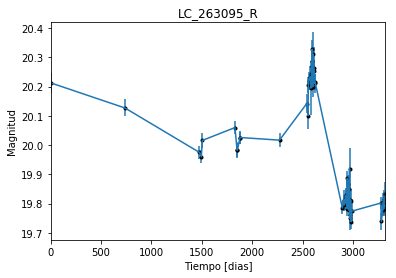

In [2]:
data = np.genfromtxt('LC_263095_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_263095_R')
plt.savefig("LC_263095_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

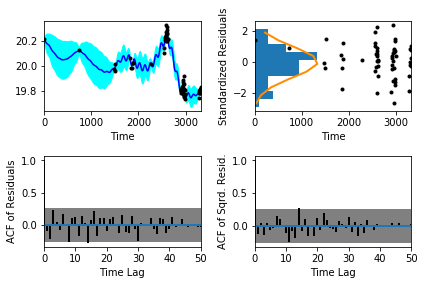

In [5]:
sample.assess_fit()

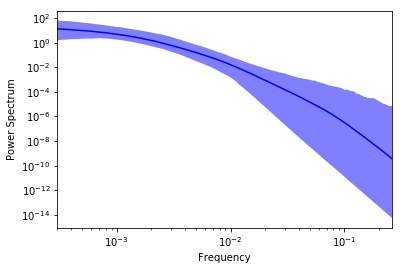

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

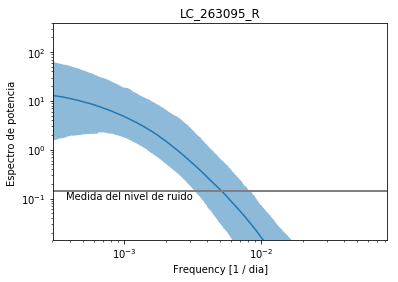

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_263095_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_263095_R')

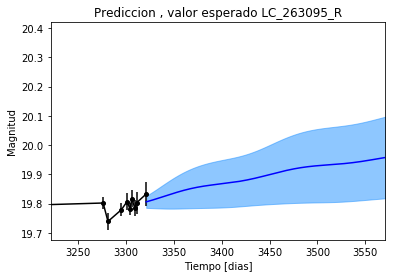

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_263095_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_263095_R')

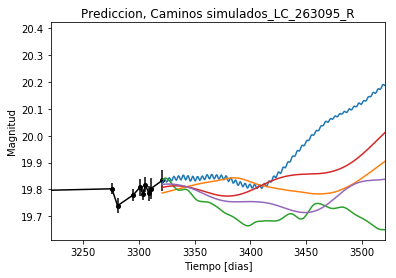

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_263095_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


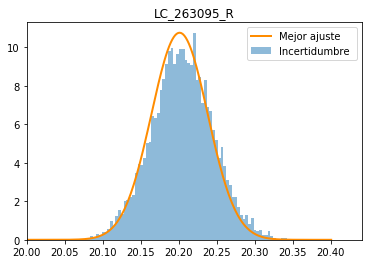

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_263095_R')
plt.savefig("Mejor_ajuste_LC_263095_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_263095_R')

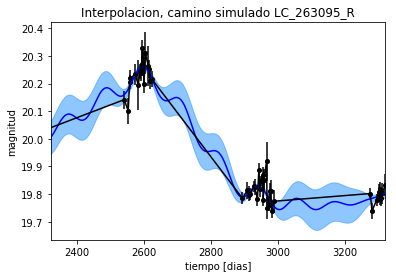

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_R')

Text(0.5,1,'Interpolacion, camino simulado LC_263095_R')

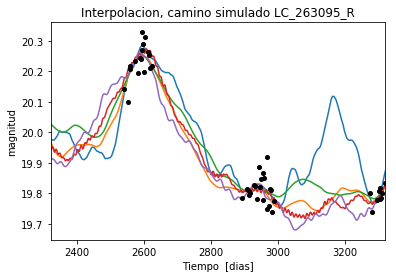

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 707.288860313
Median: 0.00894728984012
Standard deviation: 0.101467174455
68% credibility interval: [ 0.00119701  0.10761157]
95% credibility interval: [  3.74053543e-04   3.84991154e-01]
99% credibility interval: [  3.18614946e-04   4.94032194e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 607.407772688
Median: 0.00289392115448
Standard deviation: 0.0484335394955
68% credibility interval: [ 0.00059579  0.02047283]
95% credibility interval: [ 0.00033865  0.1576372 ]
99% credibility interval: [  3.11588423e-04   3.23395389e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 171.049864998
Median: 0.00899040293428
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1004.41559504
Median: 115.051335748
Standard deviation: 1.75254824573
68% credibility interval: [ 113.02730371  116.24072065]
95% credibility interval: [ 110.33586255  116.92167968]
99% credibility interval: [ 108.13570714  117.20996026]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 453.576913275
Median: 0.313031511404
Standard deviation: 1.0813323282
68% credibility interval: [ 0.05466309  1.85297791]
95% credibility interval: [ 0.01568257  3.60906482]
99% credibility interval: [ 0.01001466  5.36710682]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 409.403747849
Median: 0.214844762405
Standard deviation: 2.33395308921
68% credibility interval: [ 0.01025987  2.33131085]
95% credibility interval: [  1.75850727e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 22200.5109159
Median: 8.93715184455e-16
Standard deviation: 3.05543053378e+119
68% credibility interval: [  1.69782722e-41   2.97073960e-03]
95% credibility interval: [  5.24152892e-81   6.00103321e+74]
99% credibility interval: [  1.09205516e-090   9.19287982e+113]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3494.55742593
Median: 20.0175948039
Standard deviation: 0.0842055181947
68% credibility interval: [ 19.94683347  20.09649553]
95% credibility interval: [ 19.86181302  20.19769638]
99% credibility interval: [ 19.77658216  20.29393581]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 317.302170388
Median: 0.00981608084884
Standard deviation: 0.126330669544
68% credibility interval: [ 0.          0.20092295]
95% credibility interval: [ 0.          0.45162812]
99% credibility interval: [ 0.          0.50888317]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 317.302170388
Median: 0.00981608084884
Standard deviation: 0.126330669544
68% credibility interval: [ 0.          0.20092295]
95% credibility interval: [ 0.          0.45162812]
99% credibility interval: [ 0.          0.50888317]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1081.96010141
Median: 0.0
Standard deviation: 0.000547991984792
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1004.41559504
Median: 115.051335748
Standard deviation: 1.75254824573
68% credibility interval: [ 113.02730371  116.24072065]
95% credibility interval: [ 110.33586255  116.92167968]
99% credibility interval: [ 108.13570714  117.20996026]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2596.33414658
Median: 0.0324114272198
Standard deviation: 0.03639594801
68% credibility interval: [ 0.01962926  0.05771816]
95% credibility interval: [ 0.01338013  0.11742774]
99% credibility interval: [ 0.01064705  0.21515922]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2579.86167192
Median: 1.10483146083
Standard deviation: 0.175063863094
68% credibility interval: [ 0.95681553  1.29444174]
95% credibility interval: [ 0.82949124  1.52415593]
99% credibility interval: [ 0.75653982  1.70162914]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 647.949700536
Median: 0.000105217456814
Standard deviation: 0.0103010682555
68% credibility interval: [  1.81727984e-06   1.58089902e-03]
95% credibility interval: [  2.84243699e-79   8.63038396e-03]
99% credibility interval: [  1.24663581e-118   4.41131825e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 707.288860313
Median: (-0.0562174800625-0.496051671436j)
Standard deviation: 1.01808981099
68% credibility interval: [-0.67614346+0.j         -0.00752101-0.02780109j]
95% credibility interval: [ -2.41897076e+00+0.j          -2.35024772e-03-2.37354308j]
99% credibility interval: [ -3.10409582e+00+0.j          -2.00191675e-03-0.57203182j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 607.407772688
Median: (-0.018183042878+0.163876765972j)
Standard deviation: 0.850095370331
68% credibility interval: [-0.12863461+0.23327868j -0.00374348+0.j        ]
95% credibility interval: [-0.99046376+0.20067212j -0.00212778+0.0017101j ]
99% credibility interval: [ -2.03195316e+00+1.51905031j  -1.95776780e-03+0.04421066j]
Posterior su